<a href="https://colab.research.google.com/github/Ghalia671/MODULE1/blob/master/Ghalia_3_1_exercice_r%C3%A9gression_logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Données

In [1]:
import pandas as pd
import numpy as np



In [2]:
dic={'x': {0: '1', 1: '3', 2: '4', 3: '7', 4: '9', 5: '10', 6: '11', 7: '13', 8: '14', 9: '16'},
    'y': {0: '0', 1: '0', 2: '0', 3: '1', 4: '0', 5: '1', 6: '1', 7: '1', 8: '1', 9: '1'}}

df = pd.DataFrame(dic)


## Données d'apprentissage


In [3]:
X=df[["x"]]
y=df[["y"]]

# Régression logistique avec une variable

$$f(x)=\frac{1}{1+e^{-(ax+b)}}$$

**Question** Tracer un graphique de cette fonction en choisissant quelques valeurs pour a et b.

En particulier, la fonction s'appelle sigmoïde si a=1 et b=0.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


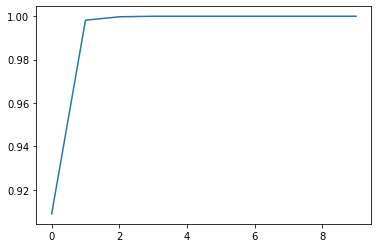

In [81]:
import matplotlib.pyplot as plt
import math

for i in y.index:
  y['y'][i]=int(y['y'][i])
for i in X.index:
  X['x'][i]=int(X['x'][i])

a=2
b=0.3

calc = []
for elt in X.values : 
  calc.append(1/(1+math.exp(-(a*elt+b))))
predX = pd.DataFrame(calc)
plt.plot(predX)
plt.show()


Vraisemblance du modèle


$$L(a,b)= \prod_{i=1}^m \hat y_i ^{y_i}\cdot  (1- \hat y_i)^{ (1-y_i)}$$

Log vraisemblance

$$logL(a,b)= \sum_{i=1}^m \hat y_i\cdot y_i + (1- \hat y_i) \cdot (1-y_i)$$

## Création de modèle

**Questions** Créer un modèle de régression logistique.

A noter que par défaut, le modèle propose une régularisation des paramètres. Pour ne pas prendre en compte la régularisation, on peut préciser: `penalty='none'`.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


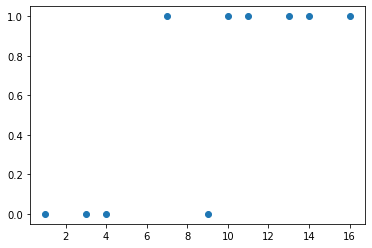

In [102]:
import numpy as np
from sklearn.linear_model import LogisticRegression
y=y.astype('int')

clf = LogisticRegression(max_iter=120,penalty='none')
clf.fit(X,y)
clf.score(X,y)
pred = clf.predict(X)

plt.scatter(X,y)
plt.show()


In [103]:
clf.coef_

array([[0.69868573]])

In [104]:
clf.intercept_

array([-5.26936572])

**Question** tracer la courbe en S.

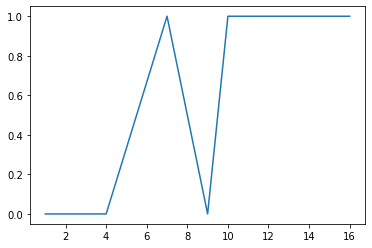

In [106]:
plt.plot(X,y)
plt.show()

## Régularisation

Il est possible d'utiliser le paramètre `C` pour créer un effet de régularisation sur les coefficients.

**Question** Tester des valeurs différentes de `C` et examiner l'influence sur les coefficients.

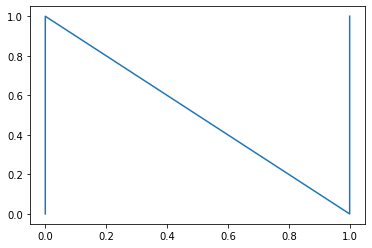

In [107]:
clf.C = 100
predC = clf.predict(X)
plt.plot(predC,y)
plt.show()

## Prédictions

**Question** Faire des prédictions pour les valeurs de x allant de 0 à 20. Et tracer la courbe.

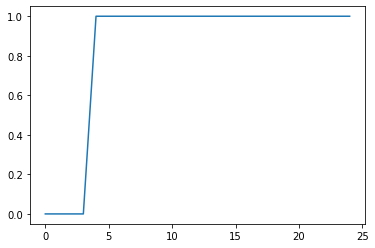

In [116]:
new_row1 ={'x':17}
X=X.append(new_row1,ignore_index=True)
new_row2 ={'x':19}
X=X.append(new_row2,ignore_index=True)
new_row3 ={'x':20}
X=X.append(new_row3,ignore_index=True)

predX2=clf.predict(X)

plt.plot(predX2)
plt.show()

# Régression logistique avec deux variables

## Simulation des données

On peut utiliser des fonctions existantes pour simuler des données.

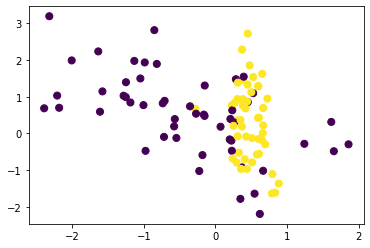

In [119]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


plt.figure()
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50)
plt.show()

## Création de modèles

**Question**  créer un modèle de régression logistique pour les deux variables.

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

clf.fit(X_C2,y_C2)
clf.predict(X_C2)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

## Visualisation des prédictions

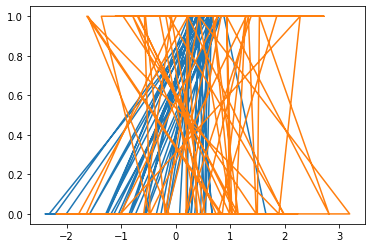

In [121]:
plt.plot(X_C2,y_C2)
plt.show()

In [141]:
import numpy as np
from matplotlib.colors import ListedColormap
def visualisation_predictions(clf, X, y, X_test, y_test, title, subplot, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))

    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)

    if plot_decision_regions:
        subplot.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    subplot.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    subplot.set_xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    subplot.set_ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        subplot.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    subplot.set_title(title)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        subplot.legend(loc=0, handles=legend_handles)



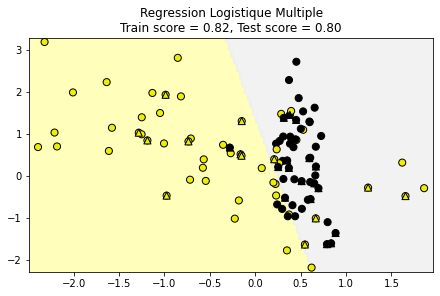

In [152]:



# vous pouvez appeler votre classifieur clf, la fonction suivante va fonctionner
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, test_size=0.3)
fig1, ax2 = plt.subplots(constrained_layout=True)
visualisation_predictions(clf, X_C2, y_C2, X_test, y_test, 'Regression Logistique Multiple',ax2)